<a href="https://colab.research.google.com/github/IsmaelMorante/clasificacionRopaTF/blob/master/clasificacionImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math

In [ ]:
# Data set Fotografias zalando
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

In [ ]:
# Visionado de metadatos
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [ ]:
# Asignacion de datos de entrenamiento y pruebas
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
# Asignacion de clases de datos
clases = metadatos.features['label'].names

In [ ]:
clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Funcion de normalizado de datos
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 # Tranformacion de 0-255 a 0-1
  return imagenes, etiquetas

In [ ]:
# Normalizado de datos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

In [ ]:
# Guardado de datos en cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

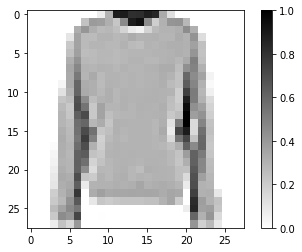

In [ ]:
# Mostrado de una imagen de prueba
for imagen, etiqueta in datos_entrenamiento.take(1):
  break

# Redimensionamiento
imagen = imagen.numpy().reshape((28, 28))

# Dibujado
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)), # 1 - Blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Clasificacion
])

In [ ]:
# Compilacion
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
# Entrenamiento
num_entrenamiento = metadatos.splits['train'].num_examples
num_pruebas = metadatos.splits['test'].num_examples
lote = 32

datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_entrenamiento).batch(lote)
datos_pruebas = datos_pruebas.batch(lote)

historial = modelo.fit(datos_entrenamiento, epochs=10, steps_per_epoch= math.ceil(num_entrenamiento / lote))

Epoch 1/10
1875/1875 [==============================] - 12s 2ms/step - loss: 0.5154 - accuracy: 0.8181
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3780 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3436 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3282 - accuracy: 0.8797
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3060 - accuracy: 0.8866
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8925
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2867 - accuracy: 0.8930
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2693 - accuracy: 0.9012
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2644 - accuracy: 0.9023
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.25

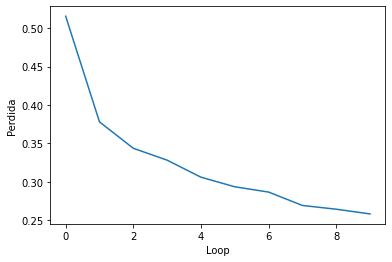

In [ ]:
# Perdida
plt.xlabel("Loop")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])

In [ ]:
# Guardado del modelo
!mkdir -p modelos/clasificacionRopa
modelo.save('modelos/clasificacionRopa/modelo')
modelo.save('modelos/clasificacionRopa/modelo.h5')

INFO:tensorflow:Assets written to: modelos/clasificacionRopa/modelo/assets


INFO:tensorflow:Assets written to: modelos/clasificacionRopa/modelo/assets
